In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
Walmart = pd.read_csv("C:\\Users\\Neha Excelr\\DataSets\\footfalls.csv")
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

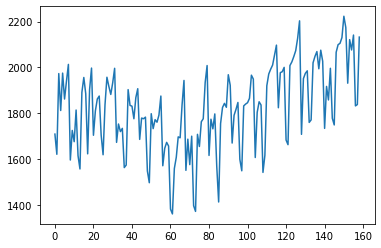

In [3]:
Walmart.Footfalls.plot()

In [4]:
len(Walmart['Footfalls'])

159

# Splitting data

In [5]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

# Moving Average 

In [6]:
list(range(2,24,6))

[2, 8, 14, 20]

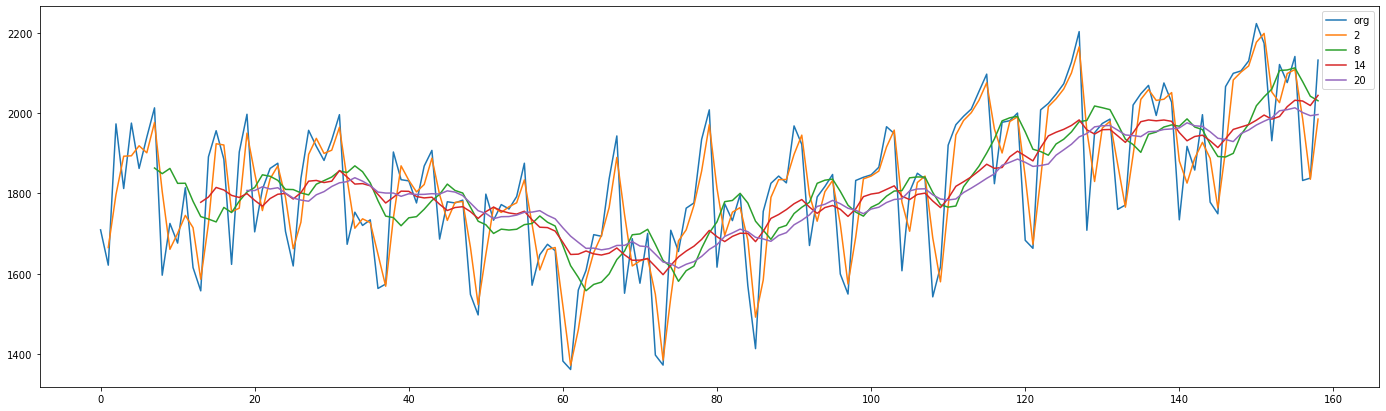

In [7]:
plt.figure(figsize=(24,7))
Walmart.Footfalls.plot(label="org")
for i in range(2,24,6):
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


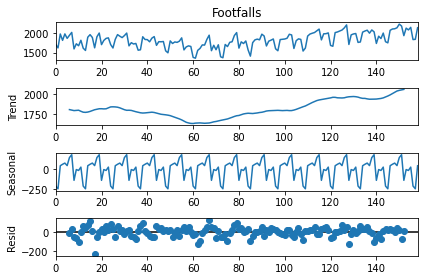

In [8]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


A partial autocorrelation (PACF) is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


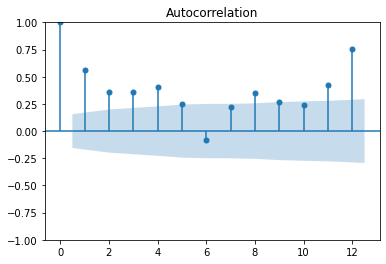

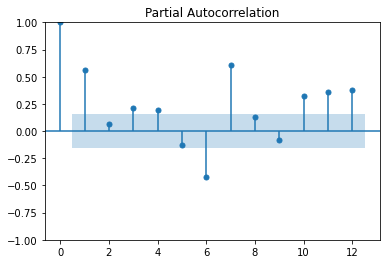

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()

### Evaluation Metric MAPE

In [10]:
#Mean Absolute Percentage Error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [11]:
#Weighted Moving Average
import pandas as pd
import numpy as np 
df = pd.DataFrame({'X':range(100,30, -5)})
weights = np.array([0.1, 0.2, 0.3, 0.4])
df['MA'] = df['X'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,X,MA
0,100,NaN
1,95,NaN
2,90,NaN
3,85,90.0
4,80,85.0
5,75,80.0
6,70,75.0
7,65,70.0
8,60,65.0
9,55,60.0


In [12]:
df=pd.DataFrame()
df['Footfalls']=Walmart["Footfalls"]
df['WMA'] = df['Footfalls'].rolling(4).apply(lambda x: np.sum(weights*x))
df

,Footfalls,WMA
0,1709,NaN
1,1621,NaN
2,1973,NaN
3,1812,1811.8
4,1975,1890.3
...,...,...
154,2076,2070.3
155,2141,2096.5
156,1832,2002.4
157,1838,1920.6


### Simple Exponential Method


In [13]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls) 

8.490637057828362

### Holt method 

In [14]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls) 

C:\Users\Neha Excelr\AppData\Local\Temp\ipykernel_15440\1714323129.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


7.546249229496066

### Holts winter exponential smoothing with additive seasonality and additive trend


In [15]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls) 

1.9154696806020324

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [16]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",
                                         seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

2.8569966488590386

## Final Model by combining train and test

In [17]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="add",trend="add",
                                         seasonal_periods=12).fit()

In [18]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2152.341622
160    2181.379165
161    2154.204233
162    2245.167311
163    2277.561778
164    1967.076270
165    2124.747718
166    2105.767817
167    2150.486499
168    1901.827845
dtype: float64